In [1]:
import pandas as pd
import numpy as np
import random_forest.helper_functions as hf
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
import importlib
importlib.reload(hf)
import math
import copy
from sklearn.ensemble import RandomForestClassifier
import os
import sys

In [2]:
data_dir = "C:/Users/juiha/OneDrive - Drexel University/Drexel/terms/term11/ECES 487/project/clustering_embeddings/random_forest/data"
fig_dir = "C:/Users/juiha/OneDrive - Drexel University/Drexel/terms/term11/ECES 487/project/clustering_embeddings/random_forest/figures"

In [3]:
# loading training data
# sample by taxa 
f = open(os.path.join(data_dir, "otu_train_.07.obj"), "rb")
otu_train = pickle.load(f)
f.close()

In [4]:
# loading test data
# sample by taxa
f = open(os.path.join(data_dir, "otu_test_.07.obj"), "rb")
otu_test = pickle.load(f)
f.close()

In [5]:
# sample by 13 feature vectors (IBD, exercise etc)
f = open(os.path.join(data_dir, "map_train_.07.obj"),"rb")
map_train = pickle.load(f)
f.close()

In [6]:
# sample by 13 feature vectors (IBD, exercise etc)
f = open(os.path.join(data_dir, "map_test_.07.obj"),"rb")
map_test = pickle.load(f)
f.close()

In [7]:
# qual_vecs: embed_id by property where property = value in embedded space 
# embed_ids, embed_seqs: mapping from id to seq
qual_vecs, embed_ids, embed_seqs = hf.getQualVecs(data_dir)

26726
26726
(26726, 100)


In [8]:
# mapping otu table to embed_ids based on embed_seqs
otu_train = hf.matchOtuQual(otu_train, embed_ids, embed_seqs)
otu_test = hf.matchOtuQual(otu_test, embed_ids, embed_seqs)

all good
all good


c:\Users\juiha\OneDrive - Drexel University\Drexel\terms\term11\ECES 487\project\clustering_embeddings\random_forest\helper_functions.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


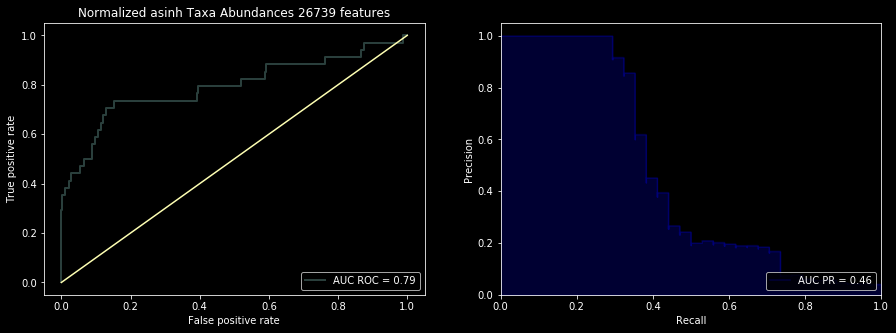

In [9]:
def asinFig(target = "IBD"):
    #Normalize with asinh
    
    f = plt.figure(figsize=(15,5))
    X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                                target = target, asinNormalized = True)
    X_train = pd.concat([X_train, X_val], axis = 0)
    y_train = y_train + y_val
    plt.subplot(1, 2, 1)
    m, auc_asin, auc_train_asin, fpr_asin, tpr_asin, prec_asin, f1_asin, f2_asin, _ = hf.predictIBD(X_train, y_train, X_test, y_test, graph_title = "Normalized asinh Taxa Abundances " + str(X_train.shape[1]) + " features",
                  max_depth = 5, n_estimators = 170, weight = 20, plot = True, plot_pr = True)

    f.savefig(os.path.join(fig_dir, "curves_AGP_test_asin.pdf"))
asinFig()

26726
26726
all good
26726
26726
all good
26726
26726
all good
c:\Users\juiha\OneDrive - Drexel University\Drexel\terms\term11\ECES 487\project\clustering_embeddings\random_forest\helper_functions.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


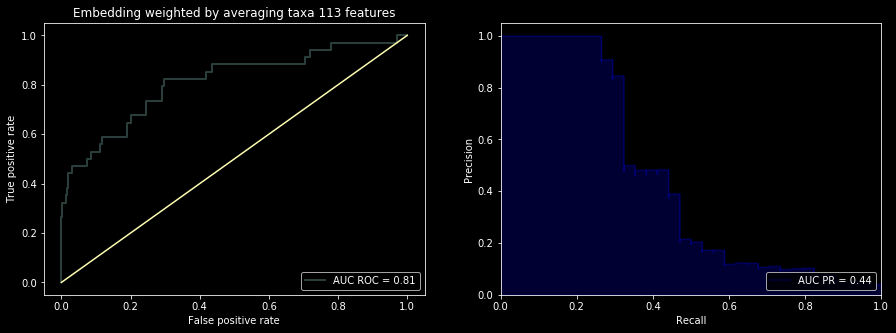

In [10]:
def embedFig(target = "IBD"):
    #Embed
    f = plt.figure(figsize=(15,5))
    X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, target = target, embed = True, qual_vecs = qual_vecs)
    X_train = pd.concat([X_train, X_val], axis = 0)
    y_train = y_train + y_val
    plt.subplot(1, 2, 1)
    m, auc_embed, auc_train_embed, fpr_embed, tpr_embed, prec_embed, f1_embed, f2_embed, _ = hf.predictIBD(X_train, y_train, X_test, y_test, graph_title = "Embedding weighted by averaging taxa "+ str(X_train.shape[1]) + " features",
                  max_depth = 5, n_estimators = 95,  weight = 20, plot = True, plot_pr = True)

    f.savefig(os.path.join(fig_dir + "curves_AGP_test_embed.pdf"))
embedFig()

c:\Users\juiha\OneDrive - Drexel University\Drexel\terms\term11\ECES 487\project\clustering_embeddings\random_forest\helper_functions.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


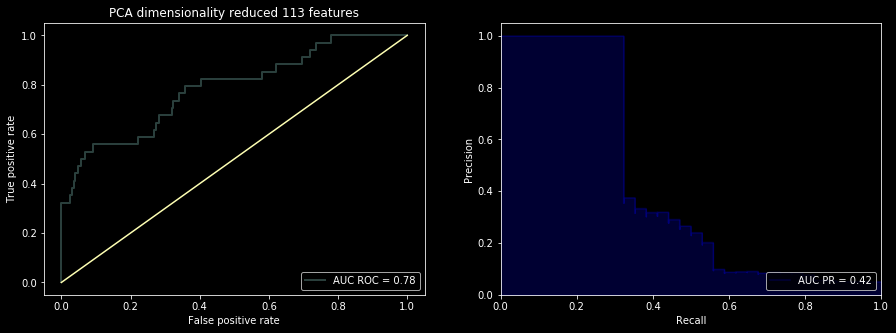

In [11]:
def pcaFig(target = "IBD"):
    f = plt.figure(figsize=(15,5))
    X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test, 
                                                                target = target, pca_reduced = True, numComponents = 100)
    X_train = pd.concat([X_train, X_val], axis = 0)
    y_train = y_train + y_val
    plt.subplot(1, 2, 1)
    m, auc_pca, auc_train_pca, fpr_pca, tpr_pca, prec_pca, f1_pca, f2_pca, _  = hf.predictIBD(X_train, y_train, X_test, y_test, graph_title = "PCA dimensionality reduced " + str(X_train.shape[1]) + " features", 
                  max_depth = 5, n_estimators = 50, weight = 20, plot = True, plot_pr = True)
    f.savefig(os.path.join(fig_dir + "curves_AGP_test_pca.pdf"))
pcaFig()

In [12]:
importlib.reload(hf)
target = "IBD"
# hf.getMlInput generates training, validation, and testing data 
# if embed is True, the data is normalized using asinh i.e. hyperbolic inverse sin function 
X_train, X_val, X_test, y_train, y_val, y_test = hf.getMlInput(otu_train, otu_test, map_train, map_test,target = target, embed = True, qual_vecs = qual_vecs)
X = pd.concat([X_train, X_val, X_test], axis = 0)
y = y_train + y_val + y_test

26726
26726
all good
26726
26726
all good
26726
26726
all good


c:\Users\juiha\OneDrive - Drexel University\Drexel\terms\term11\ECES 487\project\clustering_embeddings\random_forest\helper_functions.py:587: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
c:\Users\juiha\OneDrive - Drexel University\Drexel\terms\term11\ECES 487\project\clustering_embeddings\random_forest\helper_functions.py:587: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
c:\Users\juiha

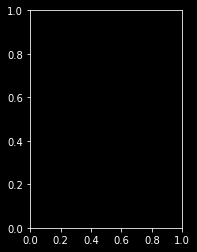

In [13]:
# These values are never used again (?)
auc_crossVal, auc_prec_crossVal, f1_crossVal, feat_imp_embed = hf.crossValPrediction(X, y, max_depth = 2, n_estimators = 50,  weight = 20)

In [14]:
# weights/importance of 113 features (100 properties + 13 demographic features)
feat_imp_df = hf.getFeatImpDf(feat_imp_embed)

In [15]:
# mapping of property to function from kegg database
pathway_table = pd.read_csv(data_dir + "/property_pathway_dict.txt",sep= "\t", dtype= {"pathway_id": 'object'})
pathway_table = pathway_table.set_index('dim')

In [16]:
tmp = pathway_table.loc[feat_imp_df.index.values, :]
# property, function, importance
feat_imp_df_paths = pd.merge(feat_imp_df, tmp, left_index = True, right_index = True)

C:\Users\juiha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [17]:
max_depth = 2
n_estimators = 50
weight = 20
weights = {0:1, 1:weight}
m = RandomForestClassifier(max_depth= max_depth, random_state=0, n_estimators=n_estimators, class_weight = weights)
m.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [18]:
def getLeafInx(estimator):
    leaf_inx = np.where([i == -1 and j == -1 for i,j in zip(estimator.tree_.children_left, estimator.tree_.children_right)])
    return(leaf_inx[0])

In [19]:
def getLabels(estimator):
    value = estimator.tree_.value
    leaf_inx = getLeafInx(estimator)
    labels = []
    for val_set in value[leaf_inx]:
        val_set = np.squeeze(val_set)
        if val_set[0] > val_set[1]:
            val = "HC"
        else:
            val = "IBD"
        labels.append(val)
    return(labels)

In [20]:
def associate_one_level(feature, label_left, label_right):
    associations[feature][label_right] += 1
    associations[feature][label_left] -= 1

In [21]:
def left_side_propogate(feature, label_left, label_right):
    if label_left == label_right:
        associations[features[0]][label_left] -= 1 #Doesn't matter which label, they're equal
    else:
        associate_one_level(feature, label_left, label_right)

In [22]:
def right_side_propogate(feature, label_left, label_right):
    if label_left == label_right:
        associations[features[0]][label_left] += 1
    else:
        associate_one_level(feature, label_left, label_right)

In [23]:
def getAssociation(associations, i):
    if associations[i]['IBD'] > associations[i]['HC']:
        return('IBD')
    if associations[i]['IBD'] == associations[i]['HC']:
        return('EQ')
    else: 
        return('HC')

In [24]:
def getDiffMag(associations, i):
    return(np.abs(associations[i]['IBD'] - associations[i]['HC']))

In [25]:
associations = {}
estimators = m.estimators_
i = 0

In [26]:
for estimator in estimators:
    #print(i)
    features = estimator.tree_.feature + 1 # the forest starts labeling it's features at 0, we start at 1
    features = features[features > 0]
    labels = getLabels(estimator)
    leaf_inx = getLeafInx(estimator)
    op1 = [2, 3, 5, 6] #full set of nodes
    op2 = [2,3,4] #no test node right
    op3 = [1, 3, 4] # no test node left
    for feat in features:
        if not feat in associations:
            associations[feat] = {'IBD': 0, 'HC':0}

    if np.array_equal(leaf_inx , op1):
        left_side_propogate(features[1], labels[0], labels[1])
        right_side_propogate(features[2], labels[2], labels[3])

    if np.array_equal(leaf_inx , op2):
        left_side_propogate(features[1], labels[0], labels[1])
        associations[features[0]][labels[2]] += 1

    if np.array_equal(leaf_inx , op3):
        right_side_propogate(features[1], labels[1], labels[2])
        associations[features[0]][labels[0]] -=1
        
    i += 1
print(associations)

{39: {'IBD': -2, 'HC': 0}, 28: {'IBD': 0, 'HC': 0}, 65: {'IBD': 2, 'HC': -2}, 73: {'IBD': 1, 'HC': 0}, 22: {'IBD': 1, 'HC': -1}, 40: {'IBD': -2, 'HC': 2}, 52: {'IBD': -2, 'HC': 0}, 87: {'IBD': 4, 'HC': -3}, 77: {'IBD': -3, 'HC': 3}, 58: {'IBD': -1, 'HC': 1}, 111: {'IBD': 2, 'HC': 0}, 105: {'IBD': 7, 'HC': -4}, 98: {'IBD': -1, 'HC': 0}, 66: {'IBD': 1, 'HC': -1}, 37: {'IBD': -2, 'HC': 2}, 82: {'IBD': -2, 'HC': 2}, 14: {'IBD': 1, 'HC': -1}, 107: {'IBD': -1, 'HC': 1}, 93: {'IBD': 7, 'HC': -3}, 24: {'IBD': 1, 'HC': -1}, 51: {'IBD': -2, 'HC': 2}, 12: {'IBD': 1, 'HC': 0}, 34: {'IBD': 2, 'HC': -2}, 76: {'IBD': -2, 'HC': 2}, 50: {'IBD': 1, 'HC': -1}, 44: {'IBD': 2, 'HC': 0}, 86: {'IBD': -3, 'HC': 3}, 55: {'IBD': 1, 'HC': -1}, 47: {'IBD': 1, 'HC': 0}, 84: {'IBD': -2, 'HC': 2}, 33: {'IBD': 3, 'HC': -3}, 18: {'IBD': 0, 'HC': 0}, 27: {'IBD': 2, 'HC': -1}, 68: {'IBD': 5, 'HC': -5}, 21: {'IBD': -1, 'HC': 1}, 8: {'IBD': -2, 'HC': 2}, 96: {'IBD': 0, 'HC': 0}, 70: {'IBD': 0, 'HC': 0}, 67: {'IBD': -1, 'H

In [27]:
associations_new = {}
for key in  associations.keys():
    associations_new[X.columns.values[key - 1]] = associations[key]

In [28]:
association = np.array(['NA '] * feat_imp_df.shape[0])
diffMag = np.zeros(feat_imp_df.shape[0])
i = 0
for prop in feat_imp_df_paths.index.values:
    if prop in associations_new.keys():
        association[i] = getAssociation(associations_new, prop)
        diffMag[i] = getDiffMag(associations_new, prop)
    else:
        association[i] = "NA"
    i +=1

In [29]:
feat_imp_df_paths.insert(3, "Association", association)
feat_imp_df_paths.insert(4, "Diff Num. Trees Associated", diffMag)
feat_imp_df_paths
feat_imp_df_paths.to_csv(data_dir + "metabolic_pathways_importance_strictDiag.csv")